However, when the number  𝑝  


  of variables is greater than the number  𝑛  


  of observations, or when the explanatory variables are very correlated, the least squares method which is hidden behind the myltiple linear  
  
  
  regression algorithm does not make it possible to solve the problem and the classic linear  
  
  
  regression model does not work. It is therefore necessary to use suitable methods.  





  To do this, the principle is to regulate the modeling a little more firmly by imposing constraints on the estimated  
  
  
  
  
  
  
  
  coefficients of the regression (constraints on the values that the  𝛽𝑖  







can take as a whole). We therefore speak of shrinkage: we narrow the range of values that the estimated parameters can take.



The Ridge model is a penalized regression model, which therefore consists of adding a constraint on the coefficients during modeling to control the amplitude of their values.        









This constraint is materialized by the addition of a penalty function in the form of an L2 norm of the coefficients. This penalty function is accompanied by a penalty coefficient  𝛼
  to be set, which makes it possible to control the impact of the penalty.



The choice of the  𝛼    



parameter is important. As a general rule, it is determined based on a predictive performance criterion. The principle is as follows: we set a range of values of  𝛼
  on which we evaluate the performance of the model and we choose the  𝛼
  which minimizes an error criterion.

(a) Run the following cell to import the modules necessary for the exercise.

In [12]:
import kagglehub
import os
import pandas as pd
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_predict, cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd

from sklearn import model_selection, preprocessing
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline 

import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Download latest version
path = kagglehub.dataset_download("toramky/automobile-dataset")

csv = os.listdir(path)[0]
df = pd.read_csv(os.path.join(path, csv))

df = df.drop(columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'fuel-system', 'engine-location', 'engine-type', 'num-of-cylinders'])

df = df.apply(pd.to_numeric, errors='coerce')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
print(df.shape)
df.head()



(160, 16)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


In [13]:
X = df.drop('price', axis=1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=789)


scaler = preprocessing.StandardScaler()

X_train[X_train.columns] = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index)

X_test[X_test.columns] = pd.DataFrame(scaler.transform(X_test), index=X_test.index)





from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train) 

print( "alpha selected by c-v :" ,ridge_reg.alpha_)
print("score train :", ridge_reg.score(X_train, y_train))
print("score test :", ridge_reg.score(X_test, y_test))







alpha selected by c-v : 10.0
score train : 0.8580537450748429
score test : 0.7730224531595324


In [14]:
ridge_pred_train = ridge_reg.predict(X_train)
ridge_pred_test = ridge_reg.predict(X_test)

print("mse train:", mean_squared_error(ridge_pred_train, y_train))
print("mse test:", mean_squared_error(ridge_pred_test, y_test))


mse train: 4437597.853095936
mse test: 10379444.796385849


Slight overfitting

The Lasso model is similar to the Ridge model but its constraint is on the L1 norm and not on the L2 norm.

The Lasso regression can thus be written:
min𝛽(||𝑌−𝑋𝛽||2+𝛼|| 𝑏𝑒𝑡𝑎||1)
 

The main advantage of Lasso regression, compared to Ridge regression, is that it can act as a variable selection device by canceling certain coefficients  𝛽𝑗
 . In fact, certain variables see their estimated coefficient zero. They are de facto excluded from the predictive model. Obviously, the higher the penalty coefficient, the more the number of coefficients estimated at 0 increases.

Attention, often among a group of correlated variables, the Lasso model chooses only one (generally the one which is most linked to the target variable), masking the influence of the others.

In [19]:
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=1)

lasso_r.fit(X_train, y_train)
lasso_r.coef_


array([ -199.70863208,   800.66153562,  1818.05824322, -1748.77787646,
        1252.63257781,   402.48485467,  1699.01617866,   721.91008813,
        -238.82447325,  -339.77403945,   604.45136592,  1992.23104828,
         -20.23867598,  -335.31105906,   522.31849744])

In [20]:
lasso_reg = Lasso(alpha=10)

lasso_reg.fit(X_train, y_train)
lasso_r.coef_

array([ -199.70863208,   800.66153562,  1818.05824322, -1748.77787646,
        1252.63257781,   402.48485467,  1699.01617866,   721.91008813,
        -238.82447325,  -339.77403945,   604.45136592,  1992.23104828,
         -20.23867598,  -335.31105906,   522.31849744])

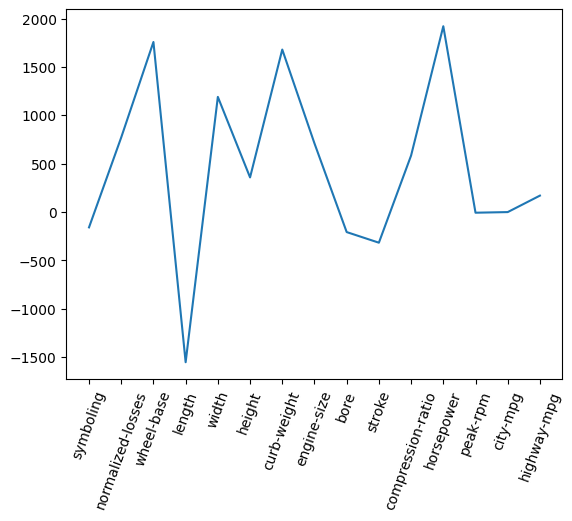

In [21]:
lasso_coef = lasso_reg.coef_

plt.plot(range(len(X.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=70)
plt.show()


In [22]:
print("score train:",lasso_reg.score(X_train,y_train))
print("score test :", lasso_reg.score(X_test,y_test))


score train: 0.8649889080274225
score test : 0.7512091753483794


In [23]:
lasso_pred_train = lasso_reg.predict(X_train)
lasso_pred_test = lasso_reg.predict(X_test)

print("mse train:", mean_squared_error(lasso_pred_train, y_train))
print("mse test:", mean_squared_error(lasso_pred_test, y_test))

mse train: 4220787.171859826
mse test: 11376943.077694817


The results of the Lasso model are slightly better on the train set than the results of the Ridge model and are similar on the test set, while doing also variables selection.

Note that it is always interesting to compare the variables selected or not by Lasso regression, depending on the  𝛼
 .

When  𝛼
  is too high, all the regression coefficients are zero, as seen here.

When  𝛼
  is too low, close to 0, we obtain the coefficients of the usual multiple linear regression.

The graph shows us that from  𝛼=0.3
 , only 3 variables are selected by the model, and that at  𝛼=1
 , effectively, all the coefficients are zero.

We thus have solution scenarios for different values of  𝛼
 . But we don't know which one performs better in prediction.

There is, just like for Ridge regression, a class LassoCV which allows you to find the   𝑜𝑝𝑡𝑖𝑚𝑎𝑙𝑎𝑙𝑝ℎ𝑎
  based on predictive performance, by cross-validation.

The function returns the  𝛼
  tested in the alphas_ attribute, the  𝛼
  retained in the alpha_ attribute, and also in the model.mse_path_ attribute the matrix containing for each   𝑎𝑙𝑝ℎ𝑎
  the value of the MSE for each cross-validation sample obtained.



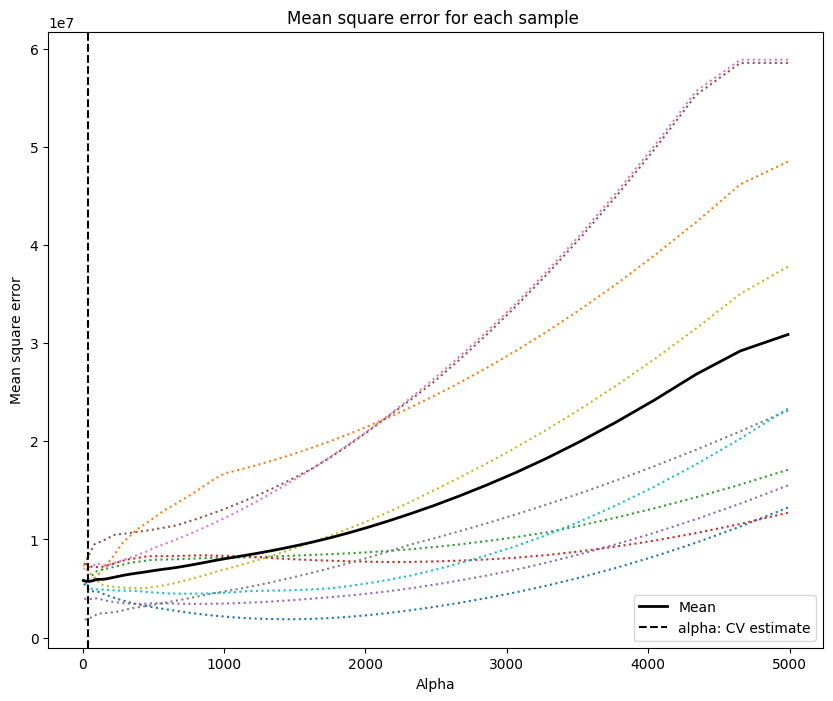

In [25]:
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(cv=10).fit(X_train, y_train)

alphas = model_lasso.alphas_

plt.figure(figsize = (10,8))

plt.plot(alphas, model_lasso.mse_path_, ':')

plt.plot(alphas, model_lasso.mse_path_.mean(axis=1), 'k',
         label='Mean', linewidth=2)

plt.axvline(model_lasso.alpha_, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error for each sample ')
plt.show()

In [26]:
pred_test = model_lasso.predict(X_test)

print("score test:", model_lasso.score(X_test, y_test))
print("mse test:", mean_squared_error(pred_test, y_test))

score test: 0.7631694475532452
mse test: 10830012.393016094
